# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for x_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 582


In [3]:
cities

['busselton',
 'vaini',
 'cidreira',
 'san patricio',
 'jamestown',
 'arraial do cabo',
 'makakilo city',
 'taolanaro',
 'newport',
 'cockburn town',
 'guaruja',
 'san borja',
 'lompoc',
 'hovd',
 'castro',
 'lagoa',
 'new norfolk',
 'attawapiskat',
 'atuona',
 'souillac',
 'kaeo',
 'kruisfontein',
 'torbay',
 'lebu',
 'port hardy',
 'rikitea',
 'sinnamary',
 'rocha',
 'valdivia',
 'bhuj',
 'amderma',
 'san juan',
 'sungai besar',
 'tasiilaq',
 'cape town',
 'dikson',
 'broken hill',
 'svetlogorsk',
 'sarangani',
 'kaitangata',
 'saint-ambroise',
 'port alfred',
 'talnakh',
 'kahului',
 'kilindoni',
 'albany',
 'carballo',
 'dingle',
 'sept-iles',
 'roma',
 'provideniya',
 'raigarh',
 'sitka',
 'punta arenas',
 'mataura',
 'pisco',
 'saskylakh',
 'lebedyn',
 'chuy',
 'carnarvon',
 'kanniyakumari',
 'namibe',
 'saint-joseph',
 'east london',
 'ambilobe',
 'mezen',
 'saint-philippe',
 'neuquen',
 'nikolskoye',
 'kapaa',
 'ushuaia',
 'casablanca',
 'roebourne',
 'mayo',
 'kirkwall',
 'ill

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city_2 in enumerate(cities):

       
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (f"{url}q={city_2}&appid={weather_api_key}&units={units}")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city_2))

    # Add 1 to the record count
    record_count += 1
   
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["temp_min"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city_2, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | cidreira
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | makakilo city
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | newport
Processing Record 10 of Set 1 | cockburn town
Processing Record 11 of Set 1 | guaruja
Processing Record 12 of Set 1 | san borja
Processing Record 13 of Set 1 | lompoc
Processing Record 14 of Set 1 | hovd
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | lagoa
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | kaeo
Processing Record 22 o

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          534
Lat           534
Lng           534
Max Temp      534
Humidity      534
Cloudiness    534
Wind Speed    534
Country       534
Date          534
dtype: int64

In [6]:
# Display sample data
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,11.70,11.70,68,8.90,AU,1681418538
1,vaini,-21.2000,-175.2000,28.09,28.09,20,3.60,TO,1681418538
2,cidreira,-30.1811,-50.2056,19.22,19.22,100,4.62,BR,1681418509
3,san patricio,28.0170,-97.5169,27.88,24.91,5,5.48,US,1681418539
4,jamestown,42.0970,-79.2353,26.80,21.77,0,5.66,US,1681418529
...,...,...,...,...,...,...,...,...,...
529,khilok,51.3674,110.4676,-8.93,-8.93,100,1.25,RU,1681418704
530,ayan,56.4500,138.1667,-3.75,-3.75,100,6.69,RU,1681418705
531,mirabad,30.4362,61.8383,29.00,29.00,57,3.32,AF,1681418705
532,zhukovka,53.5340,33.7280,11.15,10.67,100,2.30,RU,1681418705


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,11.70,11.70,68,8.90,AU,1681418538
1,vaini,-21.2000,-175.2000,28.09,28.09,20,3.60,TO,1681418538
2,cidreira,-30.1811,-50.2056,19.22,19.22,100,4.62,BR,1681418509
3,san patricio,28.0170,-97.5169,27.88,24.91,5,5.48,US,1681418539
4,jamestown,42.0970,-79.2353,26.80,21.77,0,5.66,US,1681418529


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

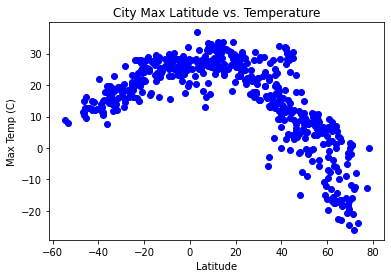

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color = "blue" )

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

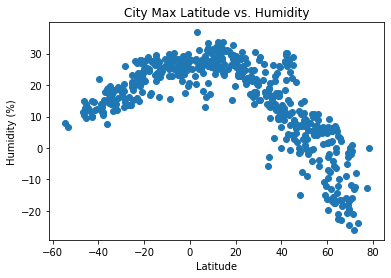

In [51]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

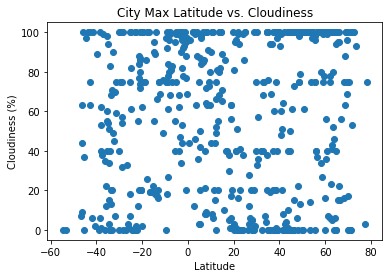

In [52]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

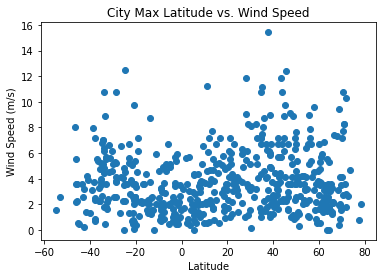

In [53]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [69]:
# Define a function to create Linear Regression plots
def lregress(x, hemi, var):
    
    res = stats.linregress(x, hemi)

    print(f"R-squared: {res.rvalue**2:.6f}")

    plt.scatter(x, y, marker="d", color="red", label= "Data")
    plt.plot(x, res.intercept + res.slope*x, label = "Regression Line")
    plt.title("Linear Regression")
    plt.xlabel("Latitude")
    plt.ylabel(f"{var}")
    plt.legend()
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,san patricio,28.0170,-97.5169,27.88,24.91,5,5.48,US,1681418539
4,jamestown,42.0970,-79.2353,26.80,21.77,0,5.66,US,1681418529
6,makakilo city,21.3469,-158.0858,27.18,23.32,0,7.20,US,1681418540
7,newport,51.5877,-2.9984,7.60,5.72,100,3.58,GB,1681418533
8,cockburn town,21.4612,-71.1419,25.82,25.82,51,6.03,TC,1681418541


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,11.70,11.70,68,8.90,AU,1681418538
1,vaini,-21.2000,-175.2000,28.09,28.09,20,3.60,TO,1681418538
2,cidreira,-30.1811,-50.2056,19.22,19.22,100,4.62,BR,1681418509
5,arraial do cabo,-22.9661,-42.0278,27.98,26.92,0,6.69,BR,1681418539
9,guaruja,-23.9931,-46.2564,27.92,27.69,0,3.60,BR,1681418541


###  Temperature vs. Latitude Linear Regression Plot

R-squared: 0.703419


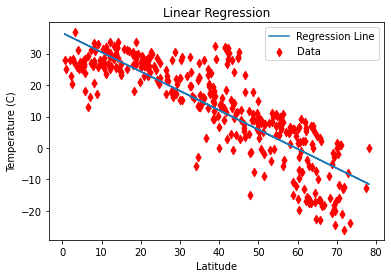

In [70]:
# Linear regression on Northern Hemispher
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
var = "Temperature (C)"

lregress(x,y,var)


347

R-squared: 0.641875


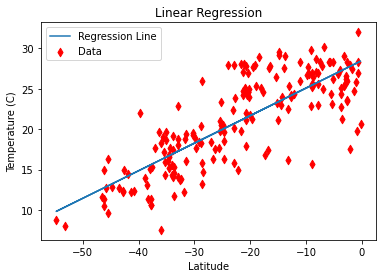

In [71]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
var = "Temperature (C)"

lregress(x,y,var)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R-squared: 0.703419


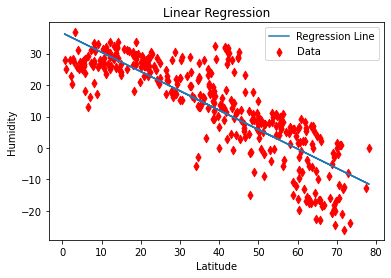

In [72]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
var = "Humidity"

lregress(x,y,var)

R-squared: 0.641875


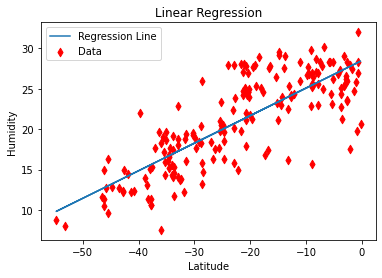

In [73]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
var = "Humidity"

lregress(x,y,var)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R-squared: 0.703419


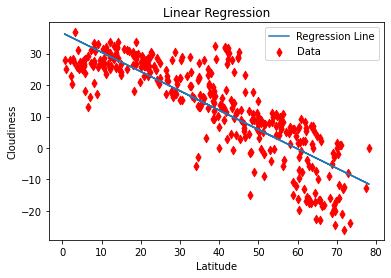

In [74]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
var = "Cloudiness"

lregress(x,y,var)

R-squared: 0.641875


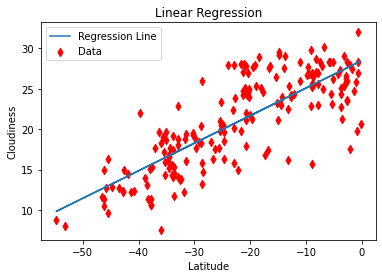

In [75]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
var = "Cloudiness"

lregress(x,y,var)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R-squared: 0.703419


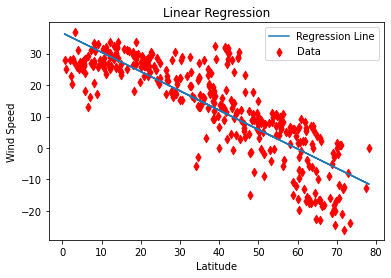

In [76]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
var = "Wind Speed"

lregress(x,y,var)

R-squared: 0.641875


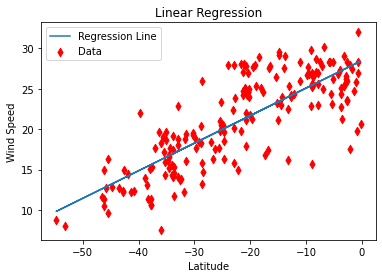

In [77]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
var = "Wind Speed"

lregress(x,y,var)

**Discussion about the linear relationship:** YOUR RESPONSE HERE